In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [2]:
df=pd.concat([X,y], axis=1)

In [3]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

radius1: float64
texture1: float64
perimeter1: float64
area1: float64
smoothness1: float64
compactness1: float64
concavity1: float64
concave_points1: float64
symmetry1: float64
fractal_dimension1: float64
radius2: float64
texture2: float64
perimeter2: float64
area2: float64
smoothness2: float64
compactness2: float64
concavity2: float64
concave_points2: float64
symmetry2: float64
fractal_dimension2: float64
radius3: float64
texture3: float64
perimeter3: float64
area3: float64
smoothness3: float64
compactness3: float64
concavity3: float64
concave_points3: float64
symmetry3: float64
fractal_dimension3: float64
Diagnosis: object


In [4]:
df["Diagnosis"] = df["Diagnosis"].astype("string")

In [5]:
df["Diagnosis"].dtypes

string[python]

In [6]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
counts = df["Diagnosis"].value_counts()
counts

Diagnosis
B    357
M    212
Name: count, dtype: Int64

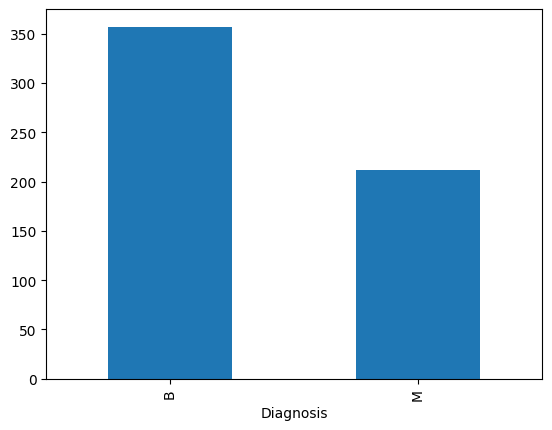

In [8]:
counts.plot(kind="bar")
plt.show()

In [9]:
df.duplicated().sum()

0

IndexError: index 30 is out of bounds for axis 0 with size 30

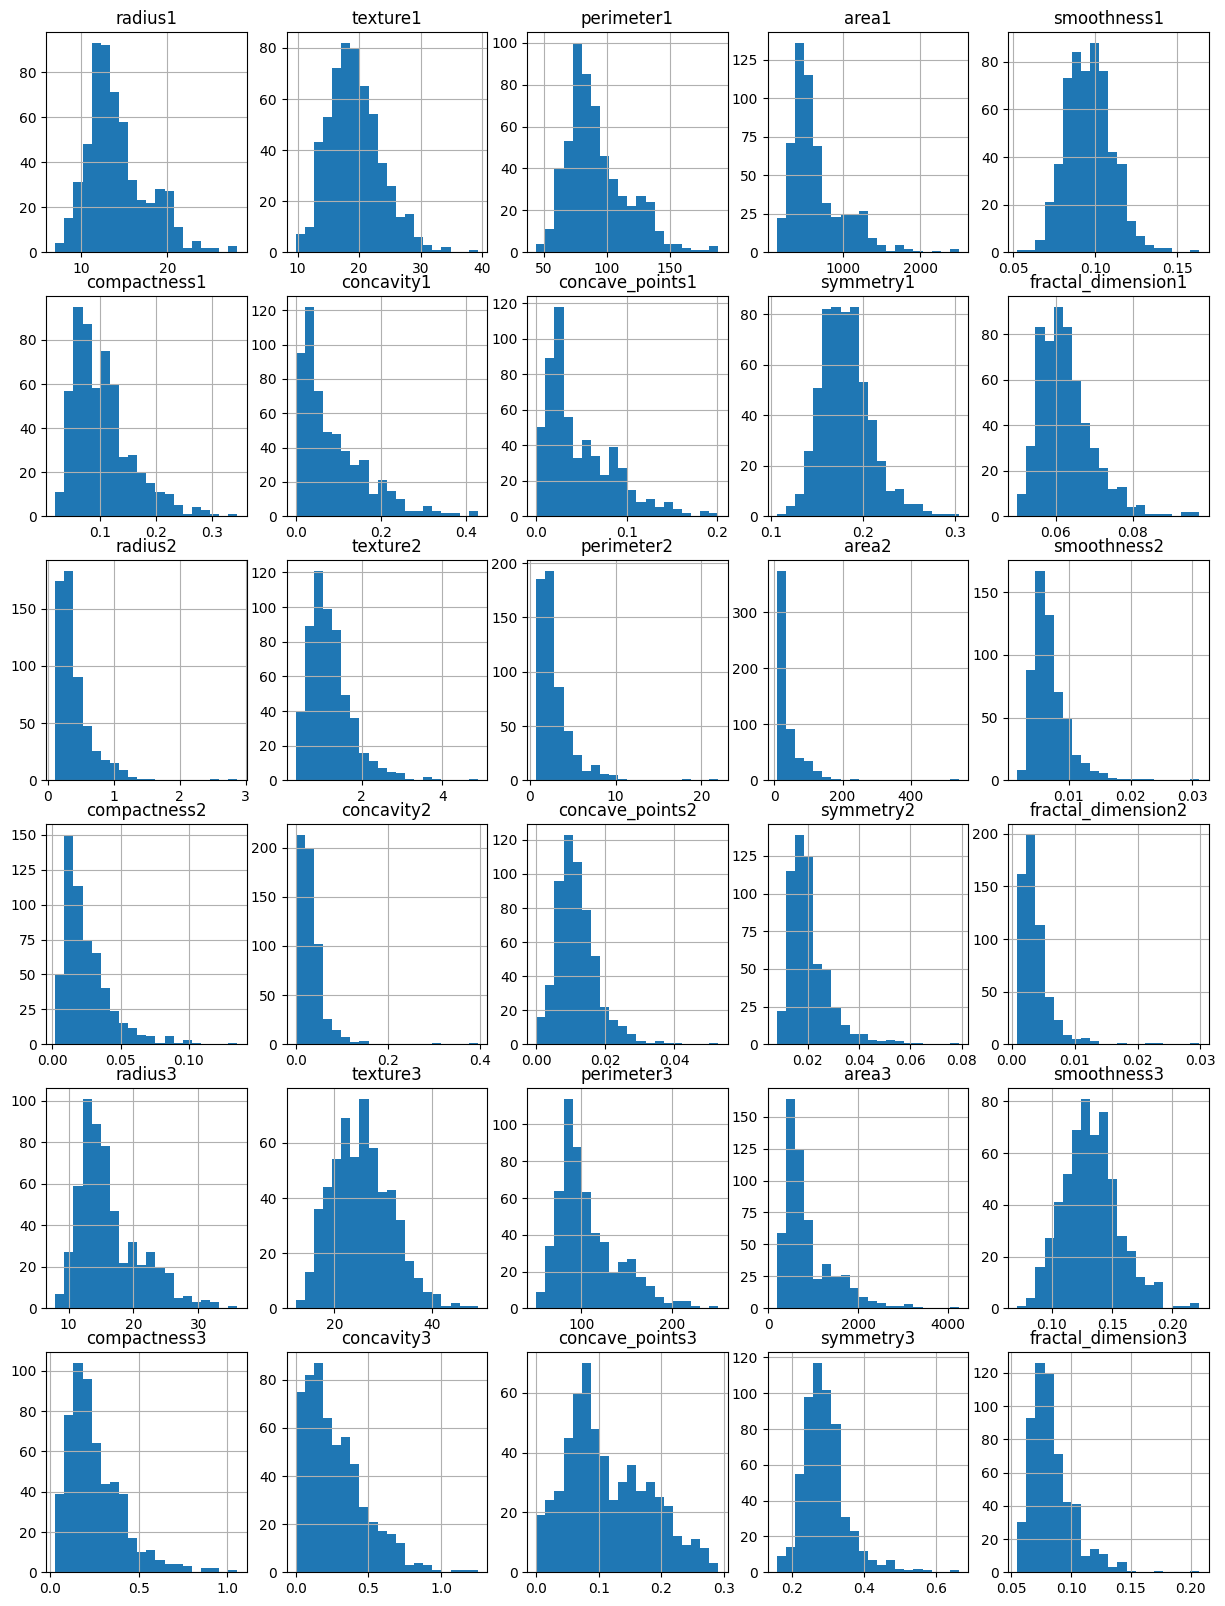

In [10]:
# Assuming df is your DataFrame with 18 columns

# Calculate the number of rows and columns needed for subplots
num_rows = 6 
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)

# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

IndexError: index 30 is out of bounds for axis 0 with size 30

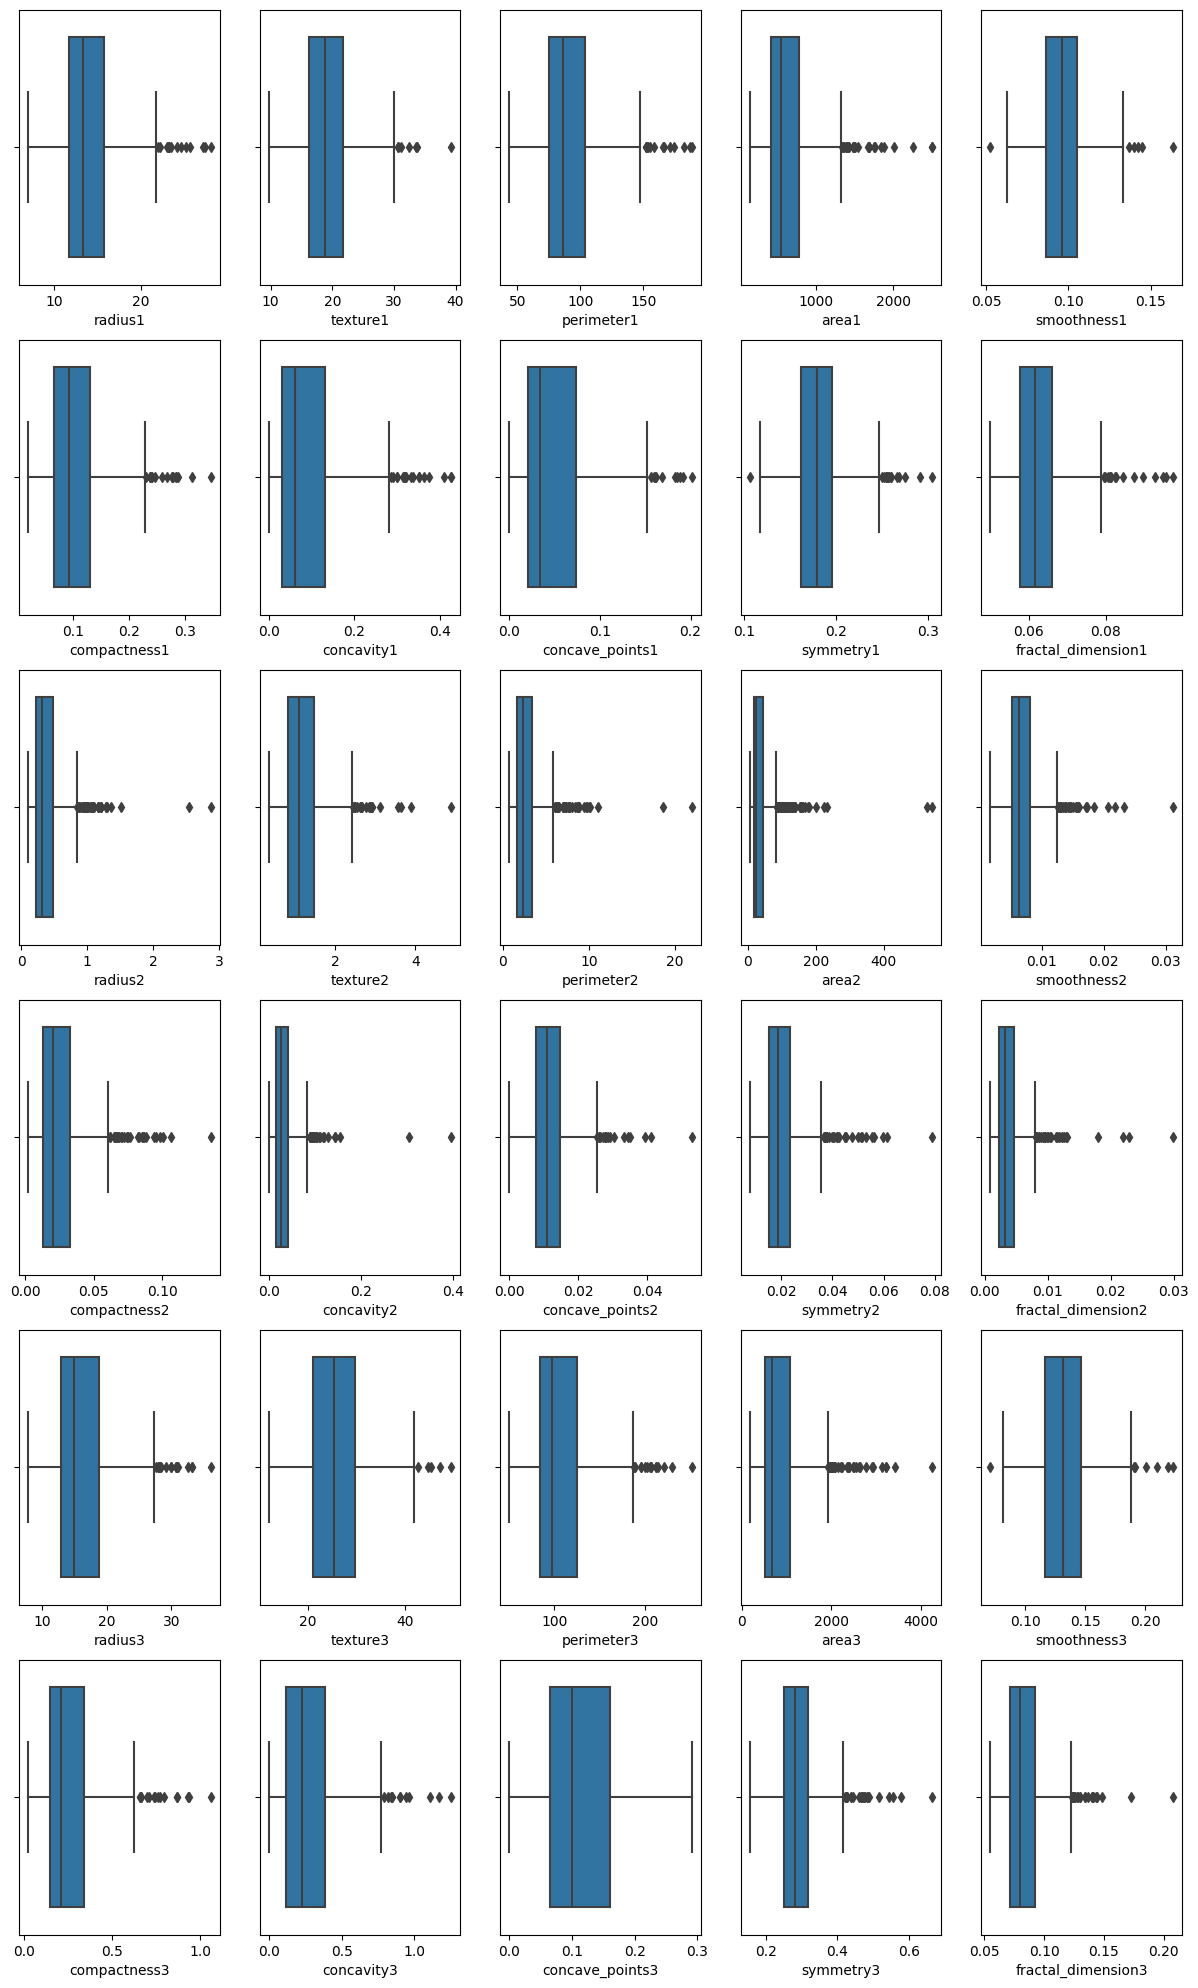

In [11]:
import seaborn as sns
# Calculate the number of rows and columns needed for subplots
num_rows = 6 
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])

# Hide any remaining empty subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')


# Show the plot
plt.show()


In [12]:
label_mapping = {'M':1  , 'B': 0}
# Transform encoded labels back to original labels using the mapping
df["Diagnosis"] = df["Diagnosis"].map(label_mapping)


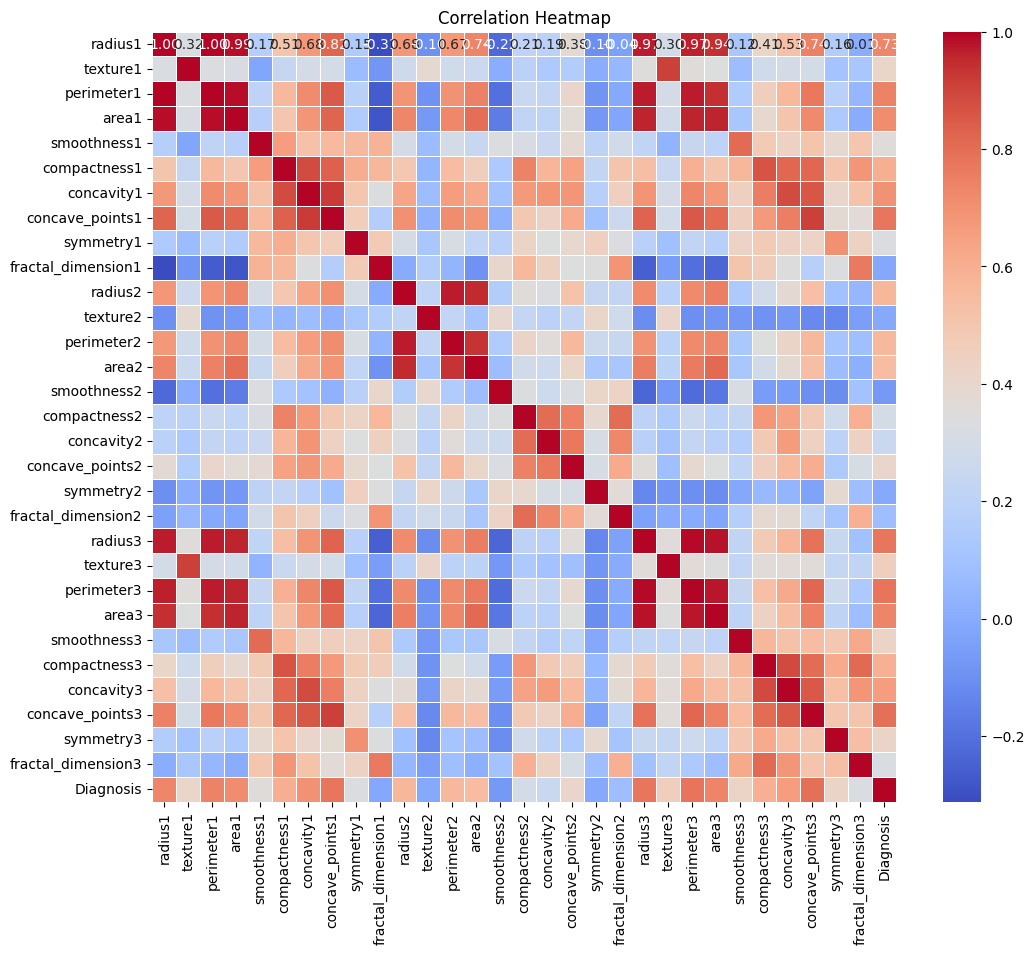

In [13]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Compute correlation with label column
correlation = df.drop('Diagnosis', axis=1).corrwith(df['Diagnosis'])
correlation = correlation.sort_values()

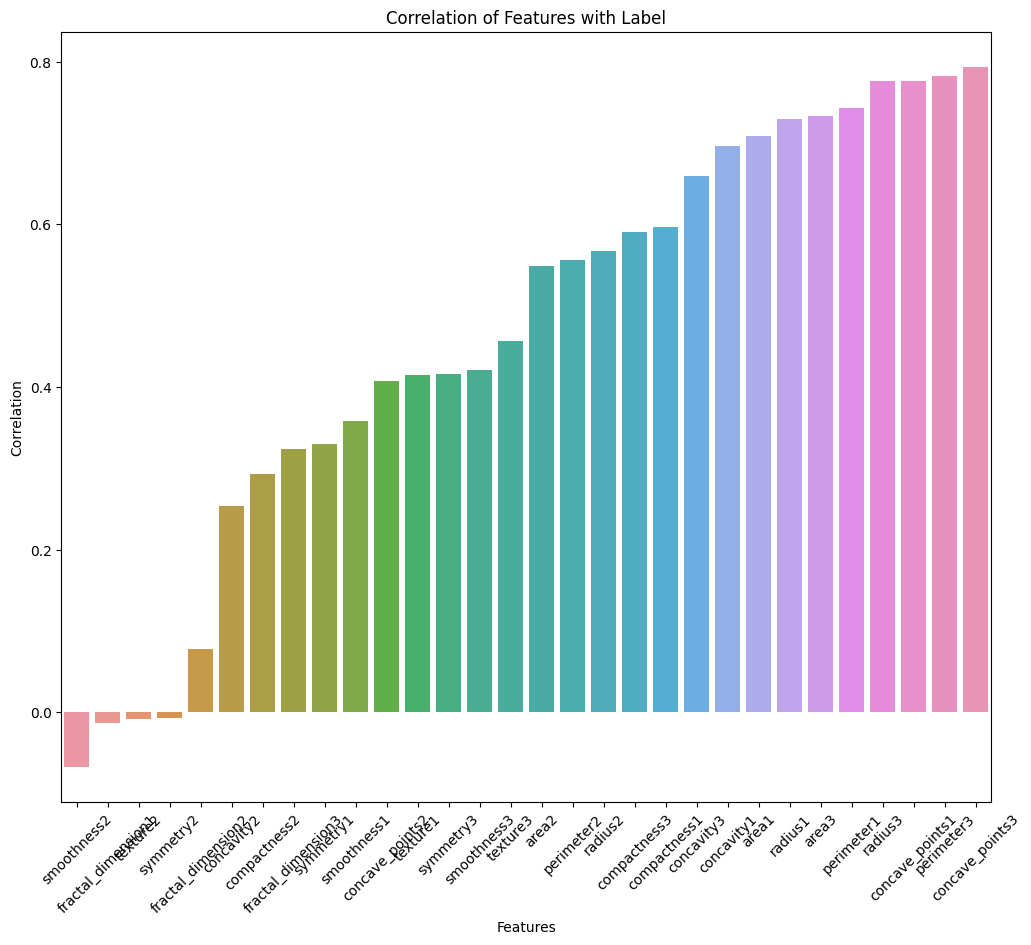

In [15]:
# Plot correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features with Label')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

# Do NOT uncomment or delete


In [ ]:
# for col in df.columns[:-1]:  # Exclude the label column
#     plt.figure(figsize=(8, 6))
#     sns.swarmplot(x=df["Diagnosis"], y=df[col])
#     plt.title(f"swarm plot for {col}")
#     plt.xlabel(col)
#     plt.ylabel("Diagnosis")
#     plt.show()


In [16]:
# Calculate mean of each column
mean_values = df.mean()

# Calculate standard deviation of each column
std_values = df.std()

# Create a new DataFrame to store mean and standard deviation
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
stats_df

,Mean,Standard Deviation
radius1,14.127292,3.524049
texture1,19.289649,4.301036
perimeter1,91.969033,24.298981
area1,654.889104,351.914129
smoothness1,0.096360,0.014064
compactness1,0.104341,0.052813
concavity1,0.088799,0.079720
concave_points1,0.048919,0.038803
symmetry1,0.181162,0.027414
fractal_dimension1,0.062798,0.007060


In [17]:
cleaned_df = df.copy()  # Create a copy of the original DataFrame

for col in df.columns:
    if col != "Diagnosis":
        lower_limit = df[col].mean() - 3 * df[col].std()
        upper_limit = df[col].mean() + 3 * df[col].std()
        
        # Replace values outside the threshold with the mean of the column
        cleaned_df[col] = df[col].apply(lambda x: df[col].mean() if (x < lower_limit or x > upper_limit) else x)
cleaned_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.300100,0.14710,0.2419,0.078710,...,17.33,184.60,2019.0,0.162200,0.665600,0.711900,0.2654,0.460100,0.118900,1
1,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,0.1812,0.056670,...,23.41,158.80,1956.0,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020,1
2,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,0.2069,0.059990,...,25.53,152.50,1709.0,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580,1
3,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,0.2597,0.062798,...,26.50,98.87,567.7,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946,1
4,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,0.1809,0.058830,...,16.67,152.20,1575.0,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.115900,0.243900,0.13890,0.1726,0.056230,...,26.40,166.10,2027.0,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150,1
565,20.13,28.25,131.20,1261.0,0.09780,0.103400,0.144000,0.09791,0.1752,0.055330,...,38.25,155.00,1731.0,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370,1
566,16.60,28.08,108.30,858.1,0.08455,0.102300,0.092510,0.05302,0.1590,0.056480,...,34.12,126.70,1124.0,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200,1
567,20.60,29.33,140.10,1265.0,0.11780,0.104341,0.088799,0.15200,0.2397,0.070160,...,39.42,184.60,1821.0,0.165000,0.254265,0.272188,0.2650,0.408700,0.124000,1


In [19]:
# Calculate mean of each column
mean_values = cleaned_df.mean()

# Calculate standard deviation of each column
std_values = cleaned_df.std()

# Create a new DataFrame to store mean and standard deviation
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})
stats_df

,Mean,Standard Deviation
radius1,14.016460,3.316002
texture1,19.180753,4.092421
perimeter1,90.930164,22.372418
area1,635.121288,307.225691
smoothness1,0.096077,0.013238
compactness1,0.101407,0.047193
concavity1,0.084268,0.070818
concave_points1,0.047474,0.036112
symmetry1,0.180289,0.025732
fractal_dimension1,0.062440,0.006252


IndexError: index 30 is out of bounds for axis 0 with size 30

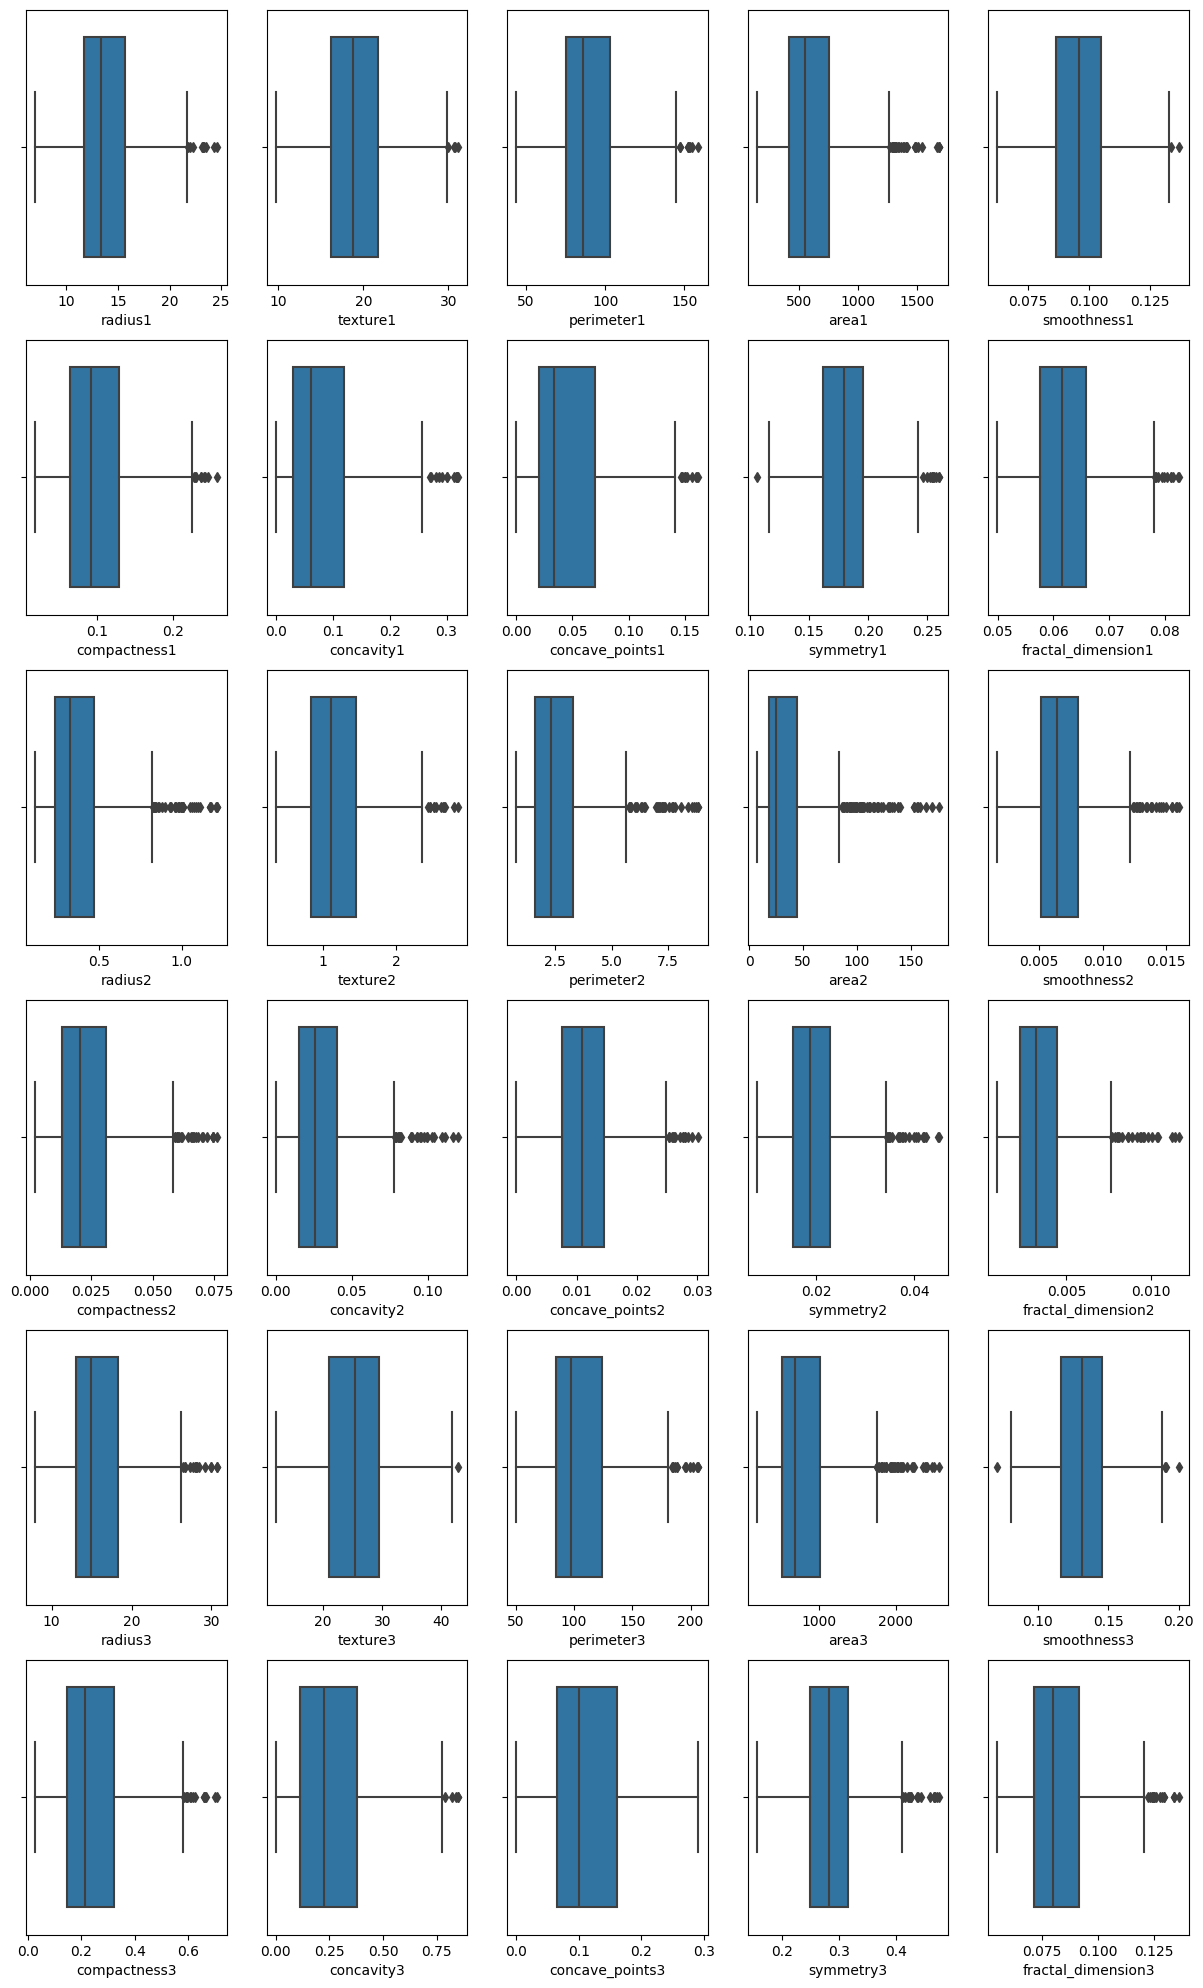

In [18]:
import seaborn as sns
# Calculate the number of rows and columns needed for subplots
num_rows = 6 
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(cleaned_df.columns):
    sns.boxplot(x=cleaned_df[col], ax=axes[i])

# Hide any remaining empty subplots
for i in range(len(cleaned_df.columns), len(axes)):
    axes[i].axis('off')


# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(cleaned_df)

# Convert the standardized array back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=cleaned_df.columns)

standardized_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(cleaned_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cleaned_df.columns)

scaled_df

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Initialize VarianceThreshold with a threshold (e.g., 0.5)
threshold = 0.01
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(scaled_df.drop("Diagnosis" , axis=1))

# Get the indices of the features that are selected
selected_features_idx = selector.get_support(indices=True)

# Get the selected feature names
selected_features = scaled_df.columns[selected_features_idx]

# Filter the original DataFrame to keep only selected features
selected_data = scaled_df[np.append(selected_features, "Diagnosis")]

selected_data


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_df.drop(["Diagnosis"], axis=1), scaled_df["Diagnosis"], test_size=0.4, random_state=42)

# Initialize an empty set of selected features
selected_features = []
best_features = []
best_score = -float("inf")

# Define a stopping criterion (e.g., maximum number of features to select)

for feature in X_train.columns:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)   
    model.fit(X_train[selected_features] , y_train) 
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break
        
scaled_df[np.append(best_features, "Diagnosis")]       



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_df.drop(["Diagnosis"], axis=1), scaled_df["Diagnosis"], test_size=0.4, random_state=42)

# Initialize an empty set of selected features
selected_features = []
best_features = []
best_score = -float("inf")

# Define a stopping criterion (e.g., maximum number of features to select)

for feature in X_train.columns[::-1]:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)   
    model.fit(X_train[selected_features] , y_train) 
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break
        
scaled_df[np.append(best_features, "Diagnosis")]       



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_df.drop(["Diagnosis"], axis=1), scaled_df["Diagnosis"], test_size=0.4, random_state=42)



# Define a stopping criterion (e.g., maximum number of features to select)
def forwardSelection(X_train, X_val, y_train, y_val):
    # Initialize an empty set of selected features
    selected_features = []
    best_features = []
    best_score = -float("inf")
    for feature in X_train.columns:
        # Initialize a model (e.g., K Nearest Neighbors)
        model = KNeighborsClassifier(n_neighbors=1)
        selected_features.append(feature)   
        model.fit(X_train[selected_features] , y_train) 
        # Evaluate model performance
        y_pred = model.predict(X_val[selected_features])
        score = accuracy_score(y_val, y_pred)
        # Check if this feature improves the model
        if score > best_score:
            best_score = score
            best_features.append(feature)
        else:
            break
    return best_features

forwardFeatures = forwardSelection(X_train, X_val, y_train, y_val)
for feature in forwardFeatures.reverse:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)   
    model.fit(X_train[selected_features] , y_train) 
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break

scaled_df[np.append(best_features, "Diagnosis")]     
  



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_df.drop(["Diagnosis"], axis=1), scaled_df["Diagnosis"], test_size=0.4, random_state=42)

# Define a stopping criterion (e.g., maximum number of features to select)
def forwardSelection(X_train, X_val, y_train, y_val):
    # Initialize an empty set of selected features
    selected_features = []
    best_features = []
    best_score = -float("inf")
    for feature in X_train.columns:
        # Initialize a model (e.g., K Nearest Neighbors)
        model = KNeighborsClassifier(n_neighbors=1)
        selected_features.append(feature)   
        model.fit(X_train[selected_features], y_train) 
        # Evaluate model performance
        y_pred = model.predict(X_val[selected_features])
        score = accuracy_score(y_val, y_pred)
        # Check if this feature improves the model
        if score > best_score:
            best_score = score
            best_features.append(feature)
        else:
            break
    return best_features

forwardFeatures = forwardSelection(X_train, X_val, y_train, y_val)

# Reverse the order of selected features
forwardFeatures_reversed = list(reversed(forwardFeatures))

# Initialize an empty list for best features
best_features = []
best_score = -float("inf")

# Iterate over the reversed selected features
for feature in forwardFeatures_reversed:
    # Initialize a model (e.g., K Nearest Neighbors)
    model = KNeighborsClassifier(n_neighbors=1)
    selected_features.append(feature)   
    model.fit(X_train[selected_features], y_train) 
    # Evaluate model performance
    y_pred = model.predict(X_val[selected_features])
    score = accuracy_score(y_val, y_pred)
    # Check if this feature improves the model
    if score > best_score:
        best_score = score
        best_features.append(feature)
    else:
        break

# Finally, select the best features and diagnosis column from the scaled_df
selected_data_forward = scaled_df[np.append(best_features, "Diagnosis")]  
selected_data_forward

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.space import Categorical, Integer, Continuous



# Initialize a classifier (e.g., K Nearest Neighbors)
classifier = KNeighborsClassifier(n_neighbors=1)
# Initialize GeneticSelectionCV for feature selection
selector = GAFeatureSelectionCV(estimator=classifier,
                              scoring='accuracy',
                              population_size=50,
                              generations=20,
                              n_jobs=-1)
# Perform feature selection
selector.fit(X_train, y_train)


In [ ]:
selected_df = scaled_df.drop("Diagnosis", axis=1).loc[:,selector.best_features_ ]

In [ ]:
selected_df